# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as plt2

In [181]:
import pandas as pd

In [79]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Now take a look at the shapes of the X and y matricies 

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [36]:
i36000=X.loc[[35999]].values
i36000

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,  29., 154.,
        254., 243., 135.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

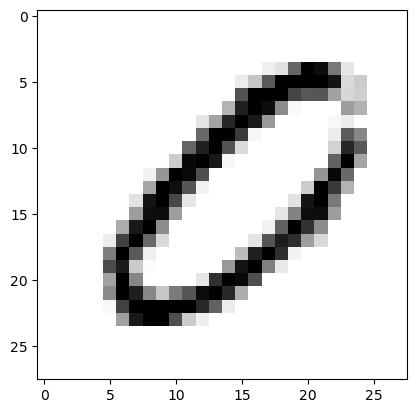

In [37]:
plt.imshow(i36000.reshape(28,28), cmap=plt2.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [93]:
i36000_bis=i36000.reshape(28,28)

In [94]:
i36000_bis[20,6]

254.0

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for testing.

In [101]:
X_train=X.loc[:60000]
y_train=y.loc[:60000]
X_test=X.loc[60000:]
y_test=y.loc[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [186]:
# Need to keep the same shape 60000 and 10000, so we keep the category 5 and we replace the others by 0

y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5',1, 0)

In [187]:
y_test_5.shape

(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer #scales the data 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [188]:
trans=PowerTransformer()
log_model = LogisticRegression() 

X_train_mod = trans.fit_transform(X_train)
X_test_mod  = trans.fit_transform(X_test)

log_model.fit(X_train_mod, y_train_5)

C:\Users\kaci\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\kaci\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\kaci\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

C:\Users\kaci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kaci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Does the classifier predict correctly the 36000th digit we picked before?

In [190]:
y_train_5[36000]

0

In [191]:
y_train_pred[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [135]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [192]:
never_5_clf.fit(X_train, y_train_5)

In [193]:
y_train_pred2 = never_5_clf.predict(X_train)

In [194]:
y_test_pred2 = never_5_clf.predict(X_test)

In [195]:
y_train_5_bool=np.array(y_train_5, dtype=bool)

In [196]:
y_test_5_bool=np.array(y_test_5, dtype=bool)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

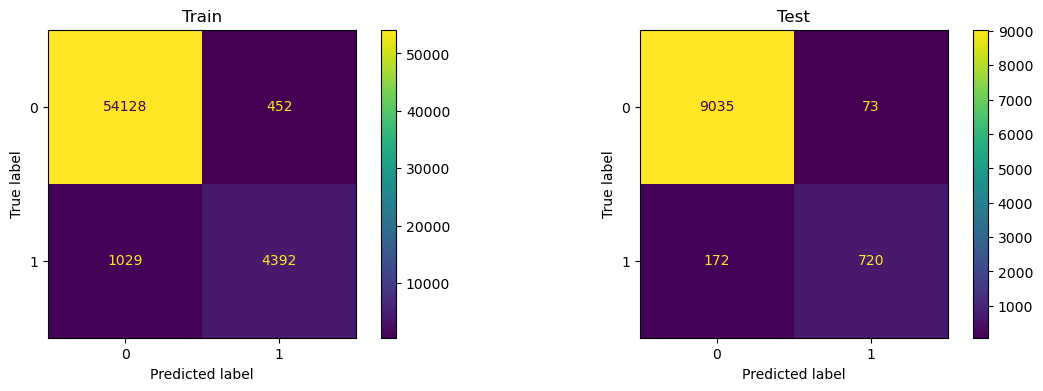

In [197]:
fig, ax=plt.subplots(1,2, figsize=(14,4))
plot_confusion_matrix(log_model,X_train_mod,y_train_5, ax=ax[0], values_format = 'd')
ax[0].set_title('Train')
plot_confusion_matrix(log_model, X_test_mod,y_test_5, ax=ax[1], values_format = 'd')
ax[1].set_title('Test')
plt.show()

In [198]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5, y_train_pred),
                                         precision_score(y_train_5, y_train_pred),
                                         recall_score(y_train_5, y_train_pred)],
                               'Test': [accuracy_score(y_test_5, y_test_pred),
                                        precision_score(y_test_5, y_test_pred),
                                        recall_score(y_test_5, y_test_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.963451,0.966100
1,Precision,0.854258,0.867198
2,Recall,0.717949,0.732063


Text(0.5, 1.0, 'Test')

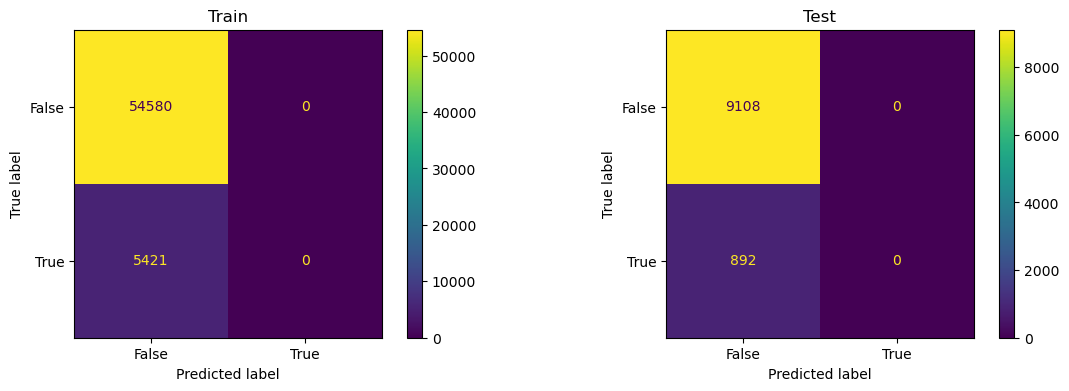

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax=plt.subplots(1,2, figsize=(14,4))

ConfusionMatrixDisplay.from_predictions(y_train_5_bool, y_train_pred2, ax=ax[0])
ax[0].set_title('Train')

ConfusionMatrixDisplay.from_predictions(y_test_5_bool, y_test_pred2, ax=ax[1])
ax[1].set_title('Test')

In [199]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_5_bool, y_train_pred2),
                                         precision_score(y_train_5_bool, y_train_pred2),
                                         recall_score(y_train_5_bool, y_train_pred2)],
                               'Test': [accuracy_score(y_test_5_bool, y_test_pred2),
                                        precision_score(y_test_5_bool, y_test_pred2),
                                        recall_score(y_test_5_bool, y_test_pred2)]})

display(performance_log)

C:\Users\kaci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaci\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.909652,0.9108
1,Precision,0.000000,0.0000
2,Recall,0.000000,0.0000


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

First one is more accurate, and something is wrong with the second one as the precision and recall are both 0

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [201]:
from sklearn.metrics import roc_curve, auc

C:\Users\kaci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


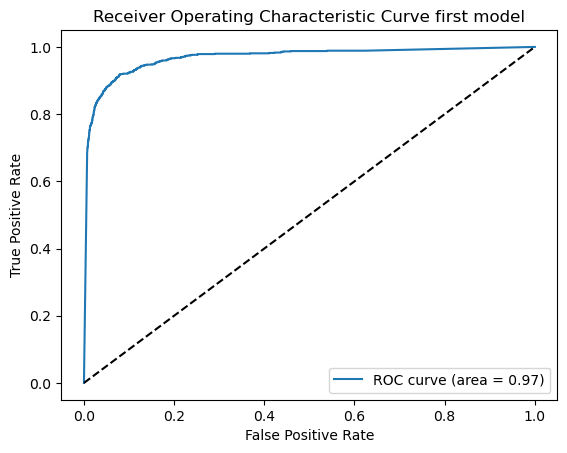

In [220]:
# Predict probabilities for the test set
probs = log_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve first model')
plt.legend(loc='lower right')
plt.show()

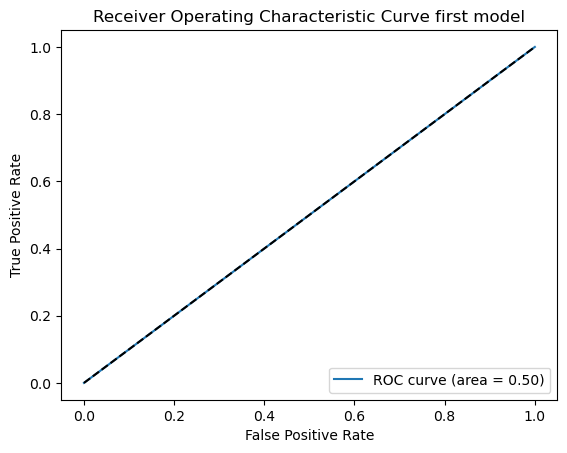

In [216]:
# Predict probabilities for the test set

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5_bool,y_test_pred2)

# Compute the Area Under the Curve (AUC)
roc_auc2 = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve first model')
plt.legend(loc='lower right')
plt.show()

### Now find the roc_auc_score for each. 

In [221]:
print(roc_auc)
print(roc_auc2)

0.9682966091013469
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

- This metric gives us the area under the ROC curve in %. It has to be as high as possible.
- The first model is good
- The second model is so bad that it would be the same as flipping a coin 